# CS381/780 Data Analytics Final Project

### Due on 5/19/2021 23:59 pm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [68]:
# for z score
from scipy import stats
# for data normalization
from sklearn.preprocessing import MaxAbsScaler
import random

### Dataset is based on an original student performance dataset provided on Kaggle

https://www.kaggle.com/impapan/student-performance-data-set


### I have modified the original dataset slightly, removed some attributes and include the first term grade from the language course


In [14]:
df = pd.read_csv("student_performance_modified.csv")
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,...,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,Math_FinalG3
0,18.0,2,2,0,6,5.0,0,F,U,GT3,...,no,no,yes,no,4,3,1,1,3,6
1,17.0,1,2,0,4,5.0,9,F,U,GT3,...,no,no,yes,yes,5,3,1,1,3,6
2,15.0,1,2,3,10,7.0,12,F,U,LE3,...,yes,no,yes,yes,4,3,2,3,3,10
3,15.0,1,3,0,2,15.0,14,F,U,GT3,...,yes,yes,yes,yes,3,2,1,1,5,15
4,16.0,1,2,0,4,6.0,11,F,U,GT3,...,yes,no,yes,no,4,3,1,2,5,10


In [7]:
df.columns

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'Math_G1',
       'Language_G1', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'schoolsup', 'famsup', 'paid', 'activities', 'higher',
       'internet', 'famrel', 'freetime', 'Dalc', 'Walc', 'health',
       'Math_FinalG3'],
      dtype='object')

### First we replace the Math_FinalG3 by a binary label to indicate underperformance

In [15]:
df['underperformance'] = df['Math_FinalG3'].apply(lambda x: 1 if x < 9 else 0)
df = df.drop(['Math_FinalG3'], axis=1)
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,sex,address,famsize,...,paid,activities,higher,internet,famrel,freetime,Dalc,Walc,health,underperformance
0,18.0,2,2,0,6,5.0,0,F,U,GT3,...,no,no,yes,no,4,3,1,1,3,1
1,17.0,1,2,0,4,5.0,9,F,U,GT3,...,no,no,yes,yes,5,3,1,1,3,1
2,15.0,1,2,3,10,7.0,12,F,U,LE3,...,yes,no,yes,yes,4,3,2,3,3,0
3,15.0,1,3,0,2,15.0,14,F,U,GT3,...,yes,yes,yes,yes,3,2,1,1,5,0
4,16.0,1,2,0,4,6.0,11,F,U,GT3,...,yes,no,yes,no,4,3,1,2,5,0


### Your task in the final project is build the best predictive model to predict who would underperform in their final Math Grade so that the school can proactively find ways to help the students

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.

### Math_G1 is the Math Grade in first term and Language_G1 is the first term grade in language. Math_G1 should have a high correlation of the Student Final Math Grade. However, it won't be available at the beginning of the school year

### Therefore, you need to build two sets of models. One set is not to use these G1 varaibles, the others you could. Find out if the language grade will be useful or not in determining the final Math grade

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


<AxesSubplot:xlabel='underperformance', ylabel='count'>

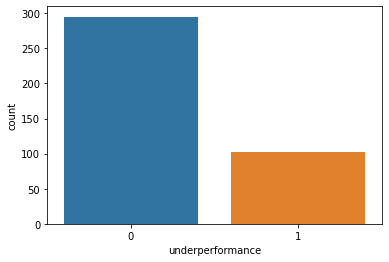

In [6]:
sns.countplot(df['underperformance'])

### Good Luck !!!

Show all your work below

## EDA Phase

### Find/replace nulls
#### I've opted to just delete them. Benefits: easy and quick. Drawbacks: am deleteing data and may mess up the distribution. Oh well.

In [42]:
df.isnull().any()

age                  True
traveltime          False
studytime           False
failures            False
absences            False
Math_G1              True
Language_G1         False
sex                 False
address             False
famsize             False
Pstatus             False
Medu                False
Fedu                False
Mjob                False
Fjob                False
schoolsup           False
famsup              False
paid                False
activities          False
higher              False
internet            False
famrel              False
freetime            False
Dalc                False
Walc                False
health              False
underperformance    False
dtype: bool

## Setup dummy variables to take care categorical variables

In [16]:
# remove NA
orig_df = df
orig_df.dropna(inplace=True)

# dummy variables
orig_df = orig_df.join(pd.get_dummies(df['Mjob'], prefix='Mjob'))
orig_df = orig_df.join(pd.get_dummies(df['Fjob'], prefix='Fjob'))
orig_df = orig_df.join(pd.get_dummies(df['famsize']))
orig_df = orig_df.join(pd.get_dummies(df['sex']))
orig_df = orig_df.join(pd.get_dummies(df['Pstatus']))
orig_df = orig_df.join(pd.get_dummies(df['address']))
orig_df = orig_df.drop(['sex', 'famsize', 'address','Pstatus','Mjob', 'Fjob'],axis=1)

# go from string yes/no to boolean
yes_no_features = ['schoolsup','famsup','paid','activities','higher','internet']
for feat in yes_no_features:
    orig_df[feat] = orig_df[feat].apply(lambda x: 1 if x=='yes' else 0)

df = orig_df

In [17]:
# rename columns that aren't clear
df = df.rename(columns={'F':'female','M':'male','A':'apart','T':'together','R':'rural','U':'urban'})

In [13]:
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,schoolsup,...,Fjob_services,Fjob_teacher,GT3,LE3,female,male,apart,together,rural,urban
0,18.0,2,2,0,6,5.0,0,4,4,1,...,0,1,1,0,1,0,1,0,0,1
1,17.0,1,2,0,4,5.0,9,1,1,0,...,0,0,1,0,1,0,0,1,0,1
2,15.0,1,2,3,10,7.0,12,1,1,1,...,0,0,0,1,1,0,0,1,0,1
3,15.0,1,3,0,2,15.0,14,4,2,0,...,1,0,1,0,1,0,0,1,0,1
4,16.0,1,2,0,4,6.0,11,3,3,0,...,0,0,1,0,1,0,0,1,0,1


In [14]:
df.columns

Index(['age', 'traveltime', 'studytime', 'failures', 'absences', 'Math_G1',
       'Language_G1', 'Medu', 'Fedu', 'schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'famrel', 'freetime', 'Dalc',
       'Walc', 'health', 'underperformance', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'GT3',
       'LE3', 'female', 'male', 'apart', 'together', 'rural', 'urban'],
      dtype='object')

### Check for outliers

In [47]:
df.shape

(396, 39)

In [18]:
threshold = 4
z = np.abs(stats.zscore(df))
print(np.where(z > threshold))
df = df[(z < threshold).all(axis=1)]

(array([  0,  10,  21,  24,  32,  38,  39,  45,  53,  58,  59,  64,  75,
        79,  90,  95, 100, 106, 110, 123, 128, 136, 144, 149, 151, 154,
       154, 161, 164, 165, 166, 167, 170, 184, 218, 220, 240, 248, 251,
       253, 258, 270, 274, 275, 277, 277, 279, 287, 293, 304, 306, 308,
       312, 315, 316, 325, 337, 344, 353, 362, 364, 372, 373, 387, 395],
      dtype=int64), array([ 6, 27, 27, 27, 26, 27,  0, 26, 27, 27, 26, 27,  4, 13, 27, 27, 26,
       27, 27, 27, 13, 26, 26, 13, 13, 13, 26, 13, 13, 13, 13, 13, 27,  4,
       27, 26, 13, 13, 13, 13, 26, 13, 26, 27,  4, 13, 27, 26, 26, 27, 26,
        4, 13, 27,  4, 26, 26, 26, 13, 13, 26, 13, 26, 26, 26],
      dtype=int64))


In [49]:
df.shape

(333, 39)

In [39]:
df.head()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,schoolsup,...,Fjob_services,Fjob_teacher,GT3,LE3,female,male,apart,together,rural,urban
0,18.0,2,2,0,6,5.0,0,4,4,1,...,0,1,1,0,1,0,1,0,0,1
1,17.0,1,2,0,4,5.0,9,1,1,0,...,0,0,1,0,1,0,0,1,0,1
2,15.0,1,2,3,10,7.0,12,1,1,1,...,0,0,0,1,1,0,0,1,0,1
3,15.0,1,3,0,2,15.0,14,4,2,0,...,1,0,1,0,1,0,0,1,0,1
4,16.0,1,2,0,4,6.0,11,3,3,0,...,0,0,1,0,1,0,0,1,0,1


## Perform basic exploration of relationship, with plots and graphs

In [15]:
df.corr()

,age,traveltime,studytime,failures,absences,Math_G1,Language_G1,Medu,Fedu,schoolsup,...,Fjob_services,Fjob_teacher,GT3,LE3,female,male,apart,together,rural,urban
age,1.000000,-0.008981,-0.060218,0.053554,0.067688,0.039180,0.043876,-0.083143,-0.073278,0.046182,...,-0.016642,-0.035020,0.018779,-0.018779,0.054082,-0.054082,-0.025386,0.025386,0.133913,-0.133913
traveltime,-0.008981,1.000000,-0.098661,0.092897,-0.013401,-0.094813,-0.053731,-0.170336,-0.157287,-0.013345,...,-0.029187,0.014452,-0.064461,0.064461,-0.061161,0.061161,-0.027694,0.027694,0.323470,-0.323470
studytime,-0.060218,-0.098661,1.000000,-0.171785,-0.063466,0.156161,0.059647,0.066914,-0.007661,0.029355,...,0.009090,-0.057231,0.071434,-0.071434,0.302384,-0.302384,-0.023184,0.023184,0.014991,-0.014991
failures,0.053554,0.092897,-0.171785,1.000000,0.063377,-0.355346,-0.113156,-0.235701,-0.249727,-0.003359,...,0.083354,-0.074031,0.015034,-0.015034,-0.045450,0.045450,0.003724,-0.003724,0.076101,-0.076101
absences,0.067688,-0.013401,-0.063466,0.063377,1.000000,-0.030049,0.037458,0.099719,0.024116,0.024198,...,0.012447,-0.025162,-0.035300,0.035300,0.067564,-0.067564,0.134657,-0.134657,0.029095,-0.029095
Math_G1,0.039180,-0.094813,0.156161,-0.355346,-0.030049,1.000000,0.316109,0.202695,0.188358,-0.202404,...,-0.017001,0.167566,-0.069292,0.069292,-0.088613,0.088613,0.015775,-0.015775,-0.063482,0.063482
Language_G1,0.043876,-0.053731,0.059647,-0.113156,0.037458,0.316109,1.000000,0.112879,0.070189,-0.187289,...,-0.044493,0.010860,0.044206,-0.044206,0.047917,-0.047917,0.039745,-0.039745,0.007764,-0.007764
Medu,-0.083143,-0.170336,0.066914,-0.235701,0.099719,0.202695,0.112879,1.000000,0.623734,-0.040160,...,-0.030719,0.260143,0.041919,-0.041919,-0.079731,0.079731,0.124062,-0.124062,-0.141331,0.141331
Fedu,-0.073278,-0.157287,-0.007661,-0.249727,0.024116,0.188358,0.070189,0.623734,1.000000,0.034084,...,0.022047,0.347408,0.058061,-0.058061,-0.035976,0.035976,0.089103,-0.089103,-0.074094,0.074094
schoolsup,0.046182,-0.013345,0.029355,-0.003359,0.024198,-0.202404,-0.187289,-0.040160,0.034084,1.000000,...,-0.042878,0.062908,0.032526,-0.032526,0.143112,-0.143112,0.039664,-0.039664,-0.012303,0.012303


In [12]:
df.corr().filter(items=['underperformance']).sort_values('underperformance', ascending=False, key = abs)

,underperformance
underperformance,1.000000
Math_G1,-0.636726
failures,0.334668
Language_G1,-0.167367
higher,-0.154225
Medu,-0.117555
Fedu,-0.112011
rural,0.097888
urban,-0.097888
paid,-0.091293


#### I am going to use all variables since that is what professor requested. But We can see how some of these attributes will probably not be very helpful.

In [ ]:
sns.pairplot(df, hue='underperformance')

#### My machine is not powerful enough to do this entire pairplot (only 8gb ram. Just ordered more). Here's a subset where the attribute's correlation on the underperformance is at least 0.10

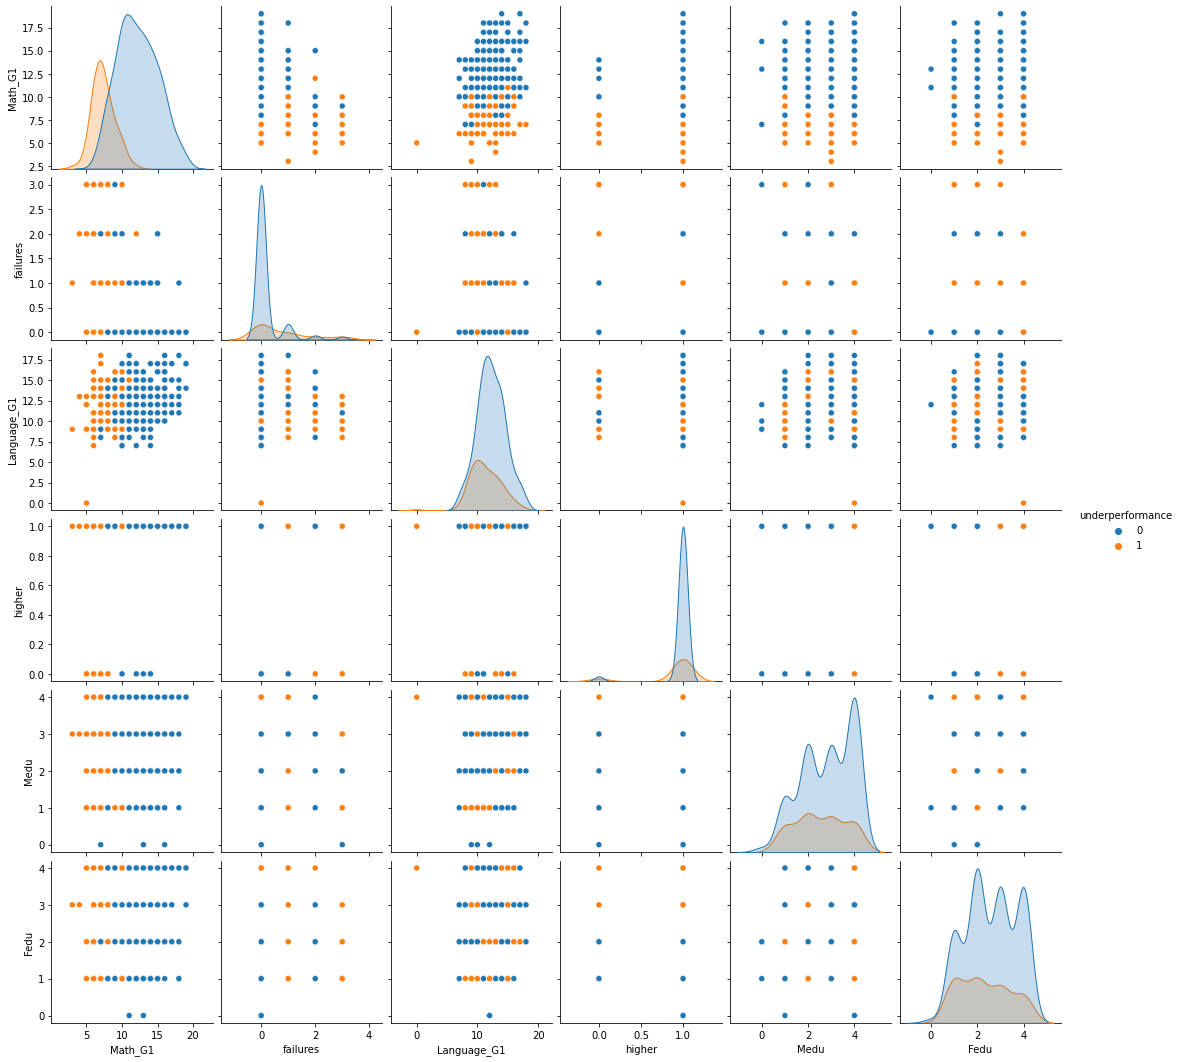

In [19]:
df_temp = df[['Math_G1','failures','Language_G1','higher','Medu','Fedu','underperformance']]
sns.pairplot(df_temp, hue='underperformance')

## Normalize numerical features if needed

### We'll use the maximum absolute scaling technique for normalization. This will allow us to modify all the columns, since  it is the simplest. Source: https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475

In [22]:
#create an abs_scaler object
abs_scaler = MaxAbsScaler()
# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(df)
# the maximum absolute values calculated by the fit method
abs_scaler.max_abs_
# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.transform(df)
# store the results in a data frame
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
# df = df_scaled

## Models

### Linear Regression Model: no G1Lang, no G1Math

### Separate data set into training and testing

In [62]:
XArray = df[df.columns.difference(['Math_G1', 'Language_G1', 'underperformance'])].values
YArray = df['underperformance'].values
X = XArray.reshape(-1, 36)
Y = YArray.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(XArray, Y, test_size=0.2, random_state=0)

In [63]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

### Check their model performance

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.31316227699393656
Mean Squared Error: 0.1594069363799558
Root Mean Squared Error: 0.399257982236994
R-squared: 0.18868737255144952


### Performed cross-validations

<AxesSubplot:xlabel='trial'>

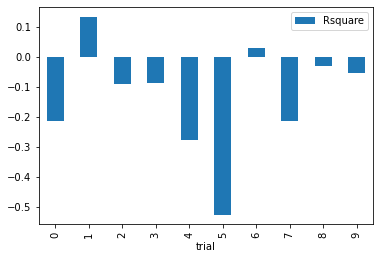

In [69]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

### This should be a simple analysis: This sucks. It clearly does not pass cross validation, and it has a horrendous r squared of less than 0.2. I can guess that it is overfitting the data. We are using all the attributes we can initially, so we can't artifitially increase r squared by adding more attributes to the model.

### Logistic Regression Model: no G1Lang, no G1Math

In [70]:
XArray = df[df.columns.difference(['Math_G1', 'Language_G1', 'underperformance'])].values
YArray = df['underperformance'].values
X = XArray.reshape(-1, 36)
Y = YArray.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(XArray, Y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)